# ISIS

_Dataset from: https://www.kaggle.com/fifthtribe/how-isis-uses-twitter_

---

## Step 1: Load Data

In which I find out how much actual data I have to work with and the enormity of the task.

- load libraries first and csv file
- then data cleaning

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import math
import datetime

import re
import textblob
from langdetect import detect


%matplotlib inline

Getting the encoding type of the csv file to open it correctly.

In [2]:
import chardet

tweets_csv = './v1/tweets1.csv'

# tweets.to_csv(tweets_csv, encoding='utf-8')

Painful lesson: very important to open the csv in 'utf-8' encoding, and save it in that same encoding too. Renders the arabic text correctly. Reading the csv using the default engine gives a buffer overflow error.

In [64]:
tweets = pd.read_csv(tweets_csv, encoding='utf-8', engine='python')

In [92]:
tweets

,Unnamed: 0,name,username,description,location,followers,numberstatuses,time,tweets,url,lang,mentions
0,0,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640.0,49.0,2015-01-06 21:00:07,ENGLISH TRANSLATION: 'A MESSAGE TO THE TRUTHFU...,"['http://t.co/73xFszsjvr', 'http://t.co/x8BZcs...",en,[]
1,1,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640.0,49.0,2015-01-06 21:00:27,ENGLISH TRANSLATION: SHEIKH FATIH AL JAWLANI '...,"['http://t.co/uqqzXGgVTz', 'http://t.co/A7nbjw...",en,[]
2,2,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640.0,49.0,2015-01-06 21:00:29,ENGLISH TRANSLATION: FIRST AUDIO MEETING WITH ...,"['http://t.co/TgXT1GdGw7', 'http://t.co/ZuE8ei...",de,[]
3,3,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640.0,49.0,2015-01-06 21:00:37,ENGLISH TRANSLATION: SHEIKH NASIR AL WUHAYSHI ...,"['http://t.co/3qg5dKlIwr', 'http://t.co/7bqk1w...",en,[]
4,4,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640.0,49.0,2015-01-06 21:00:45,ENGLISH TRANSLATION: AQAP: 'RESPONSE TO SHEIKH...,['http://t.co/2EYm9EymTe'],en,[]
5,5,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640.0,49.0,2015-01-06 21:00:51,THE SECOND CLIP IN A DA'WAH SERIES BY A SOLDIE...,"['http://t.co/EPaPRlph5W', 'http://t.co/4VUYsz...",en,[]
6,6,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640.0,49.0,2015-01-06 22:00:04,ENGLISH TRANSCRIPT : OH MURABIT! :,"['http://t.co/hujLj9KGkG', 'http://t.co/t9IxMt...",en,[]
7,7,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640.0,49.0,2015-01-06 22:00:06,ENGLISH TRANSLATION: 'A COLLECTION OF THE WORD...,"['http://t.co/AJbayWNxDQ', 'http://t.co/mAycbh...",en,[]
8,8,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640.0,49.0,2015-01-06 22:00:17,Aslm Please share our new account after the pr...,[],en,"['@KhalidMaghrebi', '@seifulmaslul123', '@Chee..."
9,9,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640.0,49.0,2015-01-10 00:00:05,ENGLISH TRANSLATION: AQAP STATEMENT REGARDING ...,"['http://t.co/qvErFO25Qj', 'http://t.co/YIcnGM...",en,[]


In [66]:
tweets.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17260 entries, 0 to 17259
Data columns (total 12 columns):
Unnamed: 0        17260 non-null int64
name              17260 non-null object
username          17260 non-null object
description       14626 non-null object
location          11356 non-null object
followers         17260 non-null object
numberstatuses    17260 non-null object
time              17260 non-null object
tweets            17260 non-null object
url               17260 non-null object
lang              17260 non-null object
mentions          17260 non-null object
dtypes: int64(1), object(11)
memory usage: 1.6+ MB


17435 entries originally. Some rows had complete 'NaN's and so were dropped. Code below.

In [82]:
tweets.columns

Index(['Unnamed: 0', 'name', 'username', 'description', 'location',
       'followers', 'numberstatuses', 'time', 'tweets', 'url', 'lang',
       'mentions'],
      dtype='object')

In [20]:
# tweets.drop(['Unnamed: 0'], axis=1, inplace=True)

In [80]:
tweets['description'].nunique()

78

In [81]:
tweets['name'].nunique() # 112 unique users AND usernames
tweets['username'].nunique()

113

In [67]:
for x in tweets:
    print (x,tweets[x].isnull().sum())

Unnamed: 0 0
name 0
username 0
description 2634
location 5904
followers 0
numberstatuses 0
time 0
tweets 0
url 0
lang 0
mentions 0


In [14]:
# empty_tweets = tweets[tweets['tweets'].isnull()].index

Dropping rows with empty tweet values and saving the csv file. 

In [70]:
# tweets.drop(empty_tweets, inplace=True) d
tweets['tweets'].isnull().sum()
tweets.to_csv(tweets_csv, encoding='utf-8')

---
## Step Two: Data Cleaning 

Problems encountered (other than not knowing a word of arabic !!!): 
- a preliminary check on the first 1000 tweets do show that langdetect hates URLs
- the langdetect algorithm  misclassified some english tweets as foreign languages when they contained URLs. 
- some tweets are in 2 languages (arabic and english, for example)

### Adding a 'Language' column

The code below takes a while to run, so after running once, the language column was appended to the tweets file. Catching cases where langdetect throws an error after failing to detect language.

In [38]:
# lg = []
# err = []
# for x in tweets['tweets']:
#     try: 
#         lg.append(detect(x))
#     except: 
#         lg.append('Language not detected') 

In [59]:
# tweets['lang'] = lg
# tweets.to_csv(tweets_csv, encoding='utf-8'
tweets.loc[2]['tweets']

'ENGLISH TRANSLATION: FIRST AUDIO MEETING WITH SHEIKH FATIH AL JAWLANI (HA): http://t.co/TgXT1GdGw7 http://t.co/ZuE8eisze6'

In [17]:
tweets['lang'].value_counts().head()

en    14385
ar      654
fr      581
id      432
so      348
Name: lang, dtype: int64

In [18]:
tweets[tweets['lang']=='fr']['username'].unique()

array(['abubakerdimshqi', 'Abu_Azzzam25', 'BilalIbnRabah1',
       'QassamiMarwan', '_IshfaqAhmad', 'Uncle_SamCoco', 'MaghrebiQM',
       'ansarakhilafa', 'MaghrabiArabi', 'abuhumayra4', 'NaseemAhmed50',
       'Battar_English', 'warrnews', 'MhzBnt', 'mustafaklash56',
       '432Mryam', 'AsimAbuMerjem', 'Baqiyah_Khilafa', 'alamreeki4',
       'Jazrawi_Joulan', 'wayyf44rer', 'mobi_ayubi', 'MaghrebiWM',
       'wayf44rerr', 'RamiAlLolah', '__alfresco__', 'ALK___226'], dtype=object)

### Moving URLs in tweets to a separate column

Some tweets had URLs. These caused the langdetect algorithm to mistake it for some other language when in fact it is in English. So I've decided to move URLs to a separate column in case I ever drum up the courage to open those URLs. Ominous. This also means I need to re-run langdetect after the URLs were removed.

In [21]:
# empty list if findall returns no match
# tweets['url'] = [re.findall('(https://t.co/[\w]+|http://t.co/[\w]+)',str(x)) for x in tweets['tweets']]
# tweets['tweets'] = [re.sub('(https://t.co/[\w]+|http://t.co/[\w]+)','',str(a)) for a in tweets['tweets']]
# tweets.head()

Running the langdetect algorithm again, and then saving all these changes to the original csv file. 

In [40]:
# lg = []
# err = []
# for x in tweets['tweets']: 
#     try: 
#         lg.append(detect(x))
#     except: 
#         lg.append('Language not detected')

In [42]:
# tweets['lang'] = lg
# tweets.to_csv(tweets_csv, encoding='utf-8')

In [35]:
tweets[tweets['lang']=='sw']

,Unnamed: 0,name,username,description,location,followers,numberstatuses,time,tweets,url,lang,mentions
178,178,ابو الدرداء #خلافة,YazeedDhardaa25,Observing a JIHAD NEWS mainly about Islamic St...,NaN,904.0,127.0,2015-09-07 18:00:00,Jazakallahu akh,[],sw,[@_mafalde_]
193,193,ابو الدرداء #خلافة,YazeedDhardaa25,Observing a JIHAD NEWS mainly about Islamic St...,NaN,823.0,127.0,2015-09-09 18:00:04,Jazakallahu akhi,[],sw,"[@IsabatuBaghdadi, @FujioMaiko, @TruthFulFamily2]"
194,194,ابو الدرداء #خلافة,YazeedDhardaa25,Observing a JIHAD NEWS mainly about Islamic St...,NaN,823.0,127.0,2015-09-09 18:00:05,I know you can search it for me ya akhi abu n...,[],sw,[@FujioMaiko]
195,195,ابو الدرداء #خلافة,YazeedDhardaa25,Observing a JIHAD NEWS mainly about Islamic St...,NaN,823.0,127.0,2015-09-09 18:00:05,Jazakallahu akhi,[],sw,[@FujioMaiko]
240,240,Kuffar Hunter 1,WhiteCat_7,Die in Rage Twitter!,NaN,362.0,798.0,2015-09-23 21:00:52,ok..shukran kathiran,[],sw,"[@skjfgyi7r6, @W97788]"
315,315,Kuffar Hunter 1,WhiteCat_7,Die in Rage Twitter!,NaN,362.0,798.0,2015-09-25 20:00:22,ameen..,[],sw,"[@shammlly12, @WilayatNinawa]"
392,392,al-Nusra,al_nusra,NaN,NaN,350.0,190.0,2015-10-06 15:00:19,add me to the BAQIYAH family ya ikhwan. Jaza...,[],sw,"[@Ukhty_08, @UANigeri]"
579,579,The Witnesser,Bajwa47online,The Dust Will Never Settle Down \n ...,NaN,427.0,1953.0,2015-11-15 05:00:30,#KhilafahNews,[],sw,[@Bajwa47online]
1149,1147,أبو أسامة الصومالي,CXaafada2,Degree from Tableeq(UK) | Masters from Alshaba...,Wilayat Hadramaut,866.0,370.0,2016-01-15 15:00:09,Akhii kuna waviongozi wachache waovu ambao h...,[],sw,"[@sumal_30, @slh_btr15]"
1493,1491,s.o.dawlah,1Dawlah_III,NaN,NaN,632.0,333.0,2016-01-23 23:00:49,#WilayatNinawa\nMosul city at night. 📷,"['https://t.co/iG06rHlAKG', 'https://t.co/9Y86...",sw,[]


### Moving usernames in tweets to a separate column

This likely affects the langdetect algorithm as well, which means I have to run it again! Need to remove the '@' as well, to easily parse this into an edge list later on. 

In [24]:
tweets['mentions'] = [re.findall('(@[\w]+)',str(x)) for x in tweets['tweets']]
tweets['tweets'] = [re.sub('(@[\w]+)','',str(a)) for a in tweets['tweets']]
tweets

,Unnamed: 0,name,username,description,location,followers,numberstatuses,time,tweets,url,lang,mentions
0,0,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640.0,49.0,2015-01-06 21:00:07,ENGLISH TRANSLATION: 'A MESSAGE TO THE TRUTHFU...,"['http://t.co/73xFszsjvr', 'http://t.co/x8BZcs...",en,[]
1,1,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640.0,49.0,2015-01-06 21:00:27,ENGLISH TRANSLATION: SHEIKH FATIH AL JAWLANI '...,"['http://t.co/uqqzXGgVTz', 'http://t.co/A7nbjw...",en,[]
2,2,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640.0,49.0,2015-01-06 21:00:29,ENGLISH TRANSLATION: FIRST AUDIO MEETING WITH ...,"['http://t.co/TgXT1GdGw7', 'http://t.co/ZuE8ei...",de,[]
3,3,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640.0,49.0,2015-01-06 21:00:37,ENGLISH TRANSLATION: SHEIKH NASIR AL WUHAYSHI ...,"['http://t.co/3qg5dKlIwr', 'http://t.co/7bqk1w...",en,[]
4,4,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640.0,49.0,2015-01-06 21:00:45,ENGLISH TRANSLATION: AQAP: 'RESPONSE TO SHEIKH...,['http://t.co/2EYm9EymTe'],en,[]
5,5,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640.0,49.0,2015-01-06 21:00:51,THE SECOND CLIP IN A DA'WAH SERIES BY A SOLDIE...,"['http://t.co/EPaPRlph5W', 'http://t.co/4VUYsz...",en,[]
6,6,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640.0,49.0,2015-01-06 22:00:04,ENGLISH TRANSCRIPT : OH MURABIT! :,"['http://t.co/hujLj9KGkG', 'http://t.co/t9IxMt...",en,[]
7,7,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640.0,49.0,2015-01-06 22:00:06,ENGLISH TRANSLATION: 'A COLLECTION OF THE WORD...,"['http://t.co/AJbayWNxDQ', 'http://t.co/mAycbh...",en,[]
8,8,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640.0,49.0,2015-01-06 22:00:17,Aslm Please share our new account after the pr...,[],en,"[@KhalidMaghrebi, @seifulmaslul123, @CheerLead..."
9,9,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640.0,49.0,2015-01-10 00:00:05,ENGLISH TRANSLATION: AQAP STATEMENT REGARDING ...,"['http://t.co/qvErFO25Qj', 'http://t.co/YIcnGM...",en,[]


### Converting the date string to datetime

Extracting the month and day from the date column, which looks like a string for now

In [68]:
from datetime import datetime

Converting date strings to datetime objects so that month and day values can easily be extracted later on. 

In [102]:
dates = [datetime.strptime(a, '%Y-%m-%d %H:%M:%S') for a in tweets['time']]
tweets['time'] = dates
#tweets.to_csv(tweets_csv, encoding='utf-8')

In [101]:
tweets.drop(tweets[tweets['time']=='en'].index, axis=0, inplace=True)

In [74]:
tweets['time'][0].month

1

**Notes on arabic**: 

- Caliphate: Khilafa خِلافة
- Jazakallahu ukhti (has the meaning of giving thanks after receiving)
- 
---

### Pre-processing tasks: 
- for LDA
- tokenization
- checking commonly occuring words in this dataset. any additional stop words that are not in the stop words corpus.
- then removing extremely common stop words 
- stemming not recommended (words sharing the same meaning can be placed in the same topic)

Understanding Text Preprocessing for Latent Dirichlet Allocation http://www.cs.cornell.edu/~xanda/winlp2017.pdf

---
## Step 3: EDA

### Ideas: 
- tweets frequency by time, by most frequent users
- commonly mentioned words and topics 
- later on after network analysis is done, behaviour of key users can be further investigated

Time series plot of tweets. Possible to match these with certain key events that happened?

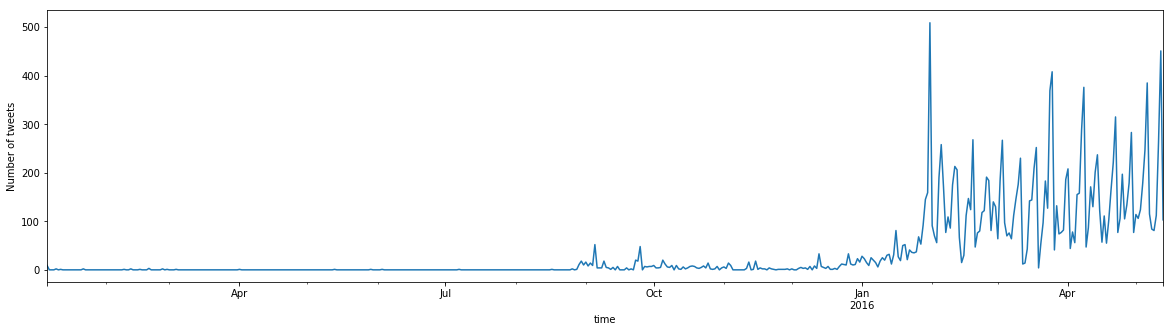

In [29]:
tweets_by_day = tweets1.set_index('time').resample('D').size()
day = tweets_by_day.plot(figsize=(20,5))
day.set_ylabel('Number of tweets')
plt.show()

Plot of tweets by day of the week. Significance of Friday (and possibly Saturday too?)

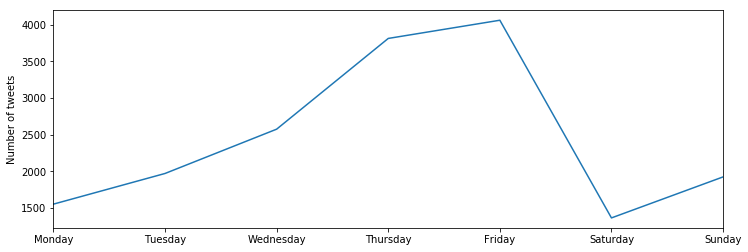

In [50]:
weekday = tweets1['time'].groupby(tweets1['time'].map(lambda x: x.weekday())).agg('size')
weekday.index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_plot = weekday.plot(figsize=(12,4))
weekday_plot.set_ylabel('Number of tweets')
plt.show()

Plot of tweets by time of the day. Inconclusive due to different timezones involved. To investigate later on if most of the tweets are from a certain timezone by matching it with a certain country/region? Expected the different timezones to balance themselves out. 

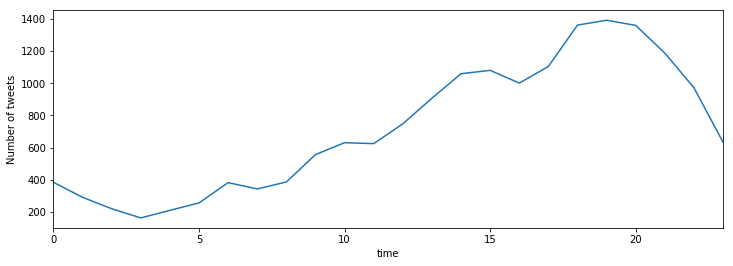

In [56]:
hour = tweets1['time'].groupby(tweets1['time'].map(lambda x: x.hour)).agg('size')
hour_plot = hour.plot(figsize=(12,4))
hour_plot.set_ylabel('Number of tweets')
plt.show()

Below, we can see that some users are a lot more active than others. Would be interesting to explore if these are the influential users. 

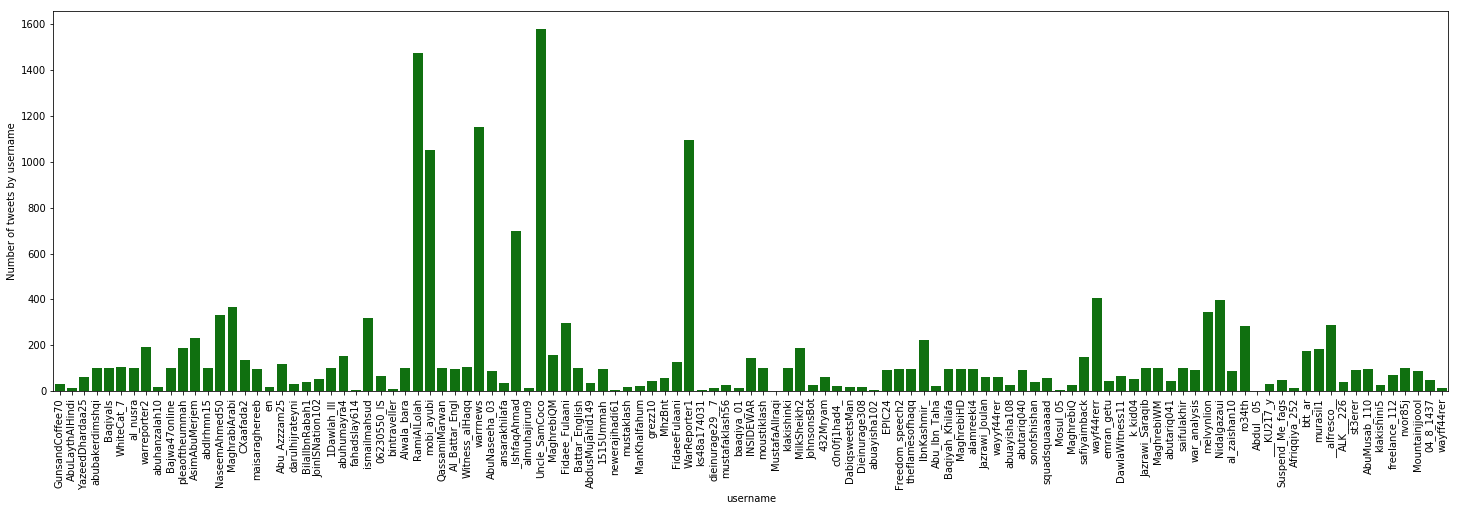

In [99]:
plt.figure(figsize=(25,7))

no_tweets = sns.countplot(x='username',data=tweets1, orient='h',color='g')
plt.ylabel('Number of tweets by username')

for item in no_tweets.get_xticklabels():
    item.set_rotation(90)
#no_tweets.set_xticklabels(rotation=90)

plt.show()

There is a funny username that is absurdly long. Let's just use the display name as the username. 

In [104]:
a = '````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````'
whereitis = tweets[tweets['username']==a].index
new_username= tweets[tweets['username']==a]['name'].iloc[0].replace(' ','')
tweets.loc[whereitis[0],['username']] = new_username

In [105]:
tweets.loc[whereitis[0],:]

Unnamed: 0                                                     6417
name                                               Mustafa Al Iraqi
username                                             MustafaAlIraqi
description                                                     NaN
location                                                        NaN
followers                                                     842.0
numberstatuses                                                113.0
time                                            2016-03-02 21:00:08
tweets            7 killed &amp; 71 injured in a #Russian air ra...
url                                                              []
lang                                                             en
mentions                                                         []
Name: 6417, dtype: object

---
## Step 3.1: Network Analysis

The network graph I need for this will only need a hundred plus nodes, so a python library like networkx should work fine for visualizations. Don't need to choose a library that is written in C++.

Cleaning up the 'mentions' column to remove extra characters, and to preprocess data for loading into an edge list.

In [127]:
a = []
b = ['']
tweets1['mentions'] = [a if x==b else x for x in tweets1['mentions']]

Prepare a dataframe as an edge list. Each node is a tweeter user, and each directed edge represents a mention (or retweet) to another user. Edge weights are the number of mentions.

A -> B : A mentioned B in tweet

In [159]:
if tweets1['mentions'][0]:
    print ('a')

Function below flattens a nested list of strings. Similar to np.flatten, but for strings!

In [107]:
def flatten_string(user_list):
    consol = []
    for y in user_list: 
        if y:
            for user in y:
                clean = user.replace(' ','') # clean usernames again to remove whitespaces!
                consol.append(clean)
    return consol

In [110]:
nl = tweets.groupby('username')['mentions'].apply(flatten_string)
# nl was later saved as a pickle called 'nodelist'.

After constructing the nodelist 'nl', compute the weights for edges connecting nodes. All this information can be included in an edge list table where the columns are as follows:
- column 1: node 1 (a tweeter user, UserA)
- column 2: node 2 (another tweeter user mentioned by UserA)
- column 3: mentions (number of times this tweeter user was mentioned by UserA in our dataset)

In [131]:
nodelist2 = nodelist.copy()

In [132]:
from collections import Counter

node1, node2, mentions = ([] for i in range(3))

for i in range(len(nodelist2)):
    # username: nodelist.index[i], list of mentions: nodelist.values[i]
    for user, weight in count1.items():
        node1.append(nodelist.index[i])
        node2.append(user)
        mentions.append(weight)

In [133]:
edgelist = pd.DataFrame({'node1': node1,
                        'node2': node2,
                        'mentions': mentions})
edgelist = edgelist.loc[:,['node1', 'node2', 'mentions']]
edgelist.head()

,node1,node2,mentions
0,04_8_1437,4_8_1437,3
1,04_8_1437,xxxzzz333,2
2,04_8_1437,04_8_1437,3
3,04_8_1437,uhhgyfergbnj,1
4,06230550_IS,4_8_1437,3


In [279]:
import networkx as nx
from nxviz import CircosPlot

g = nx.Graph() # DG = nx.DiGraph(G) to create digraph using graph G's connections.

In [280]:
for i, el in edgelist.iterrows():
    # i is the index, el is the values
    g.add_edge(el[0], el[1], mentions = el[2])

In [281]:
edgelist['mentions'].value_counts()

3    226
2    113
1    113
Name: mentions, dtype: int64

In [282]:
# defining different edgelists, grouped by their weights. 
el3 = [(u, m) for u,m,d in g.edges(data=True) if d['mentions']==3]
el2 = [(u, m) for u,m,d in g.edges(data=True) if d['mentions']==2]
el1 = [(u, m) for u,m,d in g.edges(data=True) if d['mentions']==1]

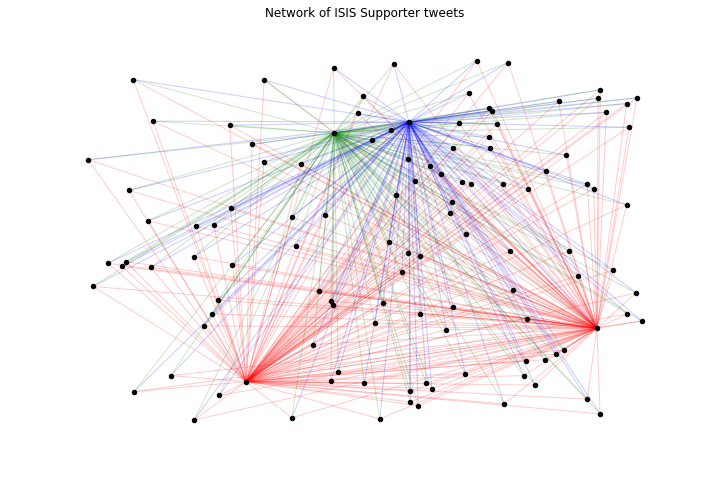

In [283]:
plt.figure(figsize=(12,8))

node_positions = nx.random_layout(g)

colors = range(10)
nx.draw_networkx_edges(g, pos=node_positions, edgelist=el3, alpha=0.2, edge_color='red')
nx.draw_networkx_edges(g, pos=node_positions, edgelist=el2, alpha=0.2, edge_color='green')
nx.draw_networkx_edges(g, pos=node_positions, edgelist=el1, alpha=0.2, edge_color='blue')

nx.draw_networkx_nodes(g, pos=node_positions, node_size=20, node_color='black')
plt.axis('off')
plt.title('Network of ISIS Supporter tweets')
plt.show()

In [251]:
import plotly.plotly as py
from plotly.graph_objs import *

In [292]:
pos = node_positions
for n, p in pos.items():
    g.node[n]['pos'] = p

In [321]:
edge_trace = Scatter(
    x=[],
    y=[],
    line=Line(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in g.edges():
    x1, y1 = g.node[edge[0]]['pos']
    x2, y2 = g.node[edge[1]]['pos']
    edge_trace['x'] += [x1, x2, None]
    edge_trace['y'] += [y1, y2, None]
    
node_trace = Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker = Marker(
        showscale=True,
        colorscale='Greens',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Connections to other users',
            xanchor='left',
            titleside='right',
        ),
        line=dict(width=2)))

for node in g.nodes():
    x, y = g.node[node]['pos']
    node_trace['x'].append(x)
    node_trace['y'].append(y)
    
# nodes and edges have to be manually added as a Scatter trace

In [322]:
connections = [len(l) for n, l in nodelist.items()]
# each element in connections is the number of connections(or adjacencies) each node has.
for adj in connections: 
    node_trace['marker']['color'].append(adj)
    node_info = '# of connections: ' + str(adj)
    node_trace['text'].append(node_info)

In [309]:
# import plotly
# plotly.tools.set_credentials_file(username='cjiahui', api_key='YjM8ek0BcgyDWvQ6EZgB')

In [323]:
fig = Figure(data=Data([edge_trace, node_trace]),
             layout=Layout(title='<br> Network of ISIS Supporters',
                          titlefont=dict(size=15),
                          showlegend=False,
                          hovermode='closest',
                          margin=dict(b=20,l=5,r=5, t=40),
                          annotations=[dict(
                          showarrow=False,
                          xref="paper", yref="paper",
                          x=0.005, y=-0.002)],
                          xaxis=XAxis(showgrid=False, zeroline=False,
                                     showticklabels=False),
                          yaxis=YAxis(showgrid=False, zeroline=False,
                                      showticklabels=False)))

py.iplot(fig, filename='network_isis')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~cjiahui/0 or inside your plot.ly account where it is named 'network_isis'


---
### Preserving Pickles
Run code below to save dataframes to pickles. 

In [106]:
import pickle
pickle_out = open('tweets1','wb')
pickle.dump(tweets, pickle_out)
pickle_out.close()

In [138]:
pickle_el = open('edgelist','wb') # tweets_date is the pickle file's name.
pickle.dump(edgelist, pickle_el)
pickle_el.close()

In [130]:
pickle_date = open('nodelist','wb') # tweets_date is the pickle file's name.
pickle.dump(nodelist, pickle_date)
pickle_date.close()

### Extracting pickles
Run code below to retrieve saved pickles.

In [62]:
# tweets1 dataframe 

import pickle
pickle_in = open('tweets1','rb')
tweets1 = pickle.load(pickle_in)
pickle_in.close()

EOFError: Ran out of input

In [5]:
# nodelist dataframe

pickle2_in = open('nodelist','rb')
nodelist = pickle.load(pickle2_in)
pickle2_in.close()

In [37]:
tweets1

,name,username,description,location,followers,numberstatuses,time,tweets,url,lang,mentions
0,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:00:07,ENGLISH TRANSLATION: 'A MESSAGE TO THE TRUTHFU...,"['http://t.co/73xFszsjvr', 'http://t.co/x8BZcs...",en,[]
1,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:00:27,ENGLISH TRANSLATION: SHEIKH FATIH AL JAWLANI '...,"['http://t.co/uqqzXGgVTz', 'http://t.co/A7nbjw...",en,[]
2,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:00:29,ENGLISH TRANSLATION: FIRST AUDIO MEETING WITH ...,"['http://t.co/TgXT1GdGw7', 'http://t.co/ZuE8ei...",de,[]
3,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:00:37,ENGLISH TRANSLATION: SHEIKH NASIR AL WUHAYSHI ...,"['http://t.co/3qg5dKlIwr', 'http://t.co/7bqk1w...",en,[]
4,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:00:45,ENGLISH TRANSLATION: AQAP: 'RESPONSE TO SHEIKH...,['http://t.co/2EYm9EymTe'],en,[]
5,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:00:51,THE SECOND CLIP IN A DA'WAH SERIES BY A SOLDIE...,"['http://t.co/EPaPRlph5W', 'http://t.co/4VUYsz...",en,[]
6,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 22:00:04,ENGLISH TRANSCRIPT : OH MURABIT! :,"['http://t.co/hujLj9KGkG', 'http://t.co/t9IxMt...",en,[]
7,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 22:00:06,ENGLISH TRANSLATION: 'A COLLECTION OF THE WORD...,"['http://t.co/AJbayWNxDQ', 'http://t.co/mAycbh...",en,[]
8,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 22:00:17,Aslm Please share our new account after the pr...,[],en,"['KhalidMaghrebi', 'seifulmaslul123', 'CheerLe..."
9,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-10 00:00:05,ENGLISH TRANSLATION: AQAP STATEMENT REGARDING ...,"['http://t.co/qvErFO25Qj', 'http://t.co/YIcnGM...",en,[]
